20 gennaio 2023
azimuth parabola: 80

azimuth vero: 75

ora inizio parabola: 00:00

ora fine parabola: 02:52

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import norm

# 20 gradi salita

In [115]:
azimuth_min =  79.9
azimuth_max = 80.1

data_i = pd.to_datetime('2023-01-20 00:00:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-20 02:52:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-20 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '20 gennaio 2023, elevazione '

file_parabola = '../../raccolta_dati/parabola/2023_01_20.txt'
file_ricevitore = '../../raccolta_dati/10GHz/2023-01-19_20.txt'

In [116]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [117]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

In [118]:
while parabola.at[0,'elevazione'] > 20.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)

In [119]:
delta_time = pd.Timedelta(hours = 1)

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_m - 2*delta_time
mask_20 = parabola.elevazione <= 20.5
mask_21 = parabola.elevazione >= 19.5
up20_parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4 & mask_20 & mask_21]
up20_parabola.reset_index(inplace=True, drop=True)

In [120]:
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

In [121]:
mask_5 = ricevitore_10.data_ora >= up20_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= up20_parabola.iloc[-1]['data_ora'] + delta_time
mask_300 = ricevitore_10.rad <= 3800
up20_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_300]

In [122]:
up20_parabola['data_ora'] = up20_parabola['data_ora'] + 2*delta_time
up20_ricevitore_10['data_ora'] = up20_ricevitore_10['data_ora'] + delta_time

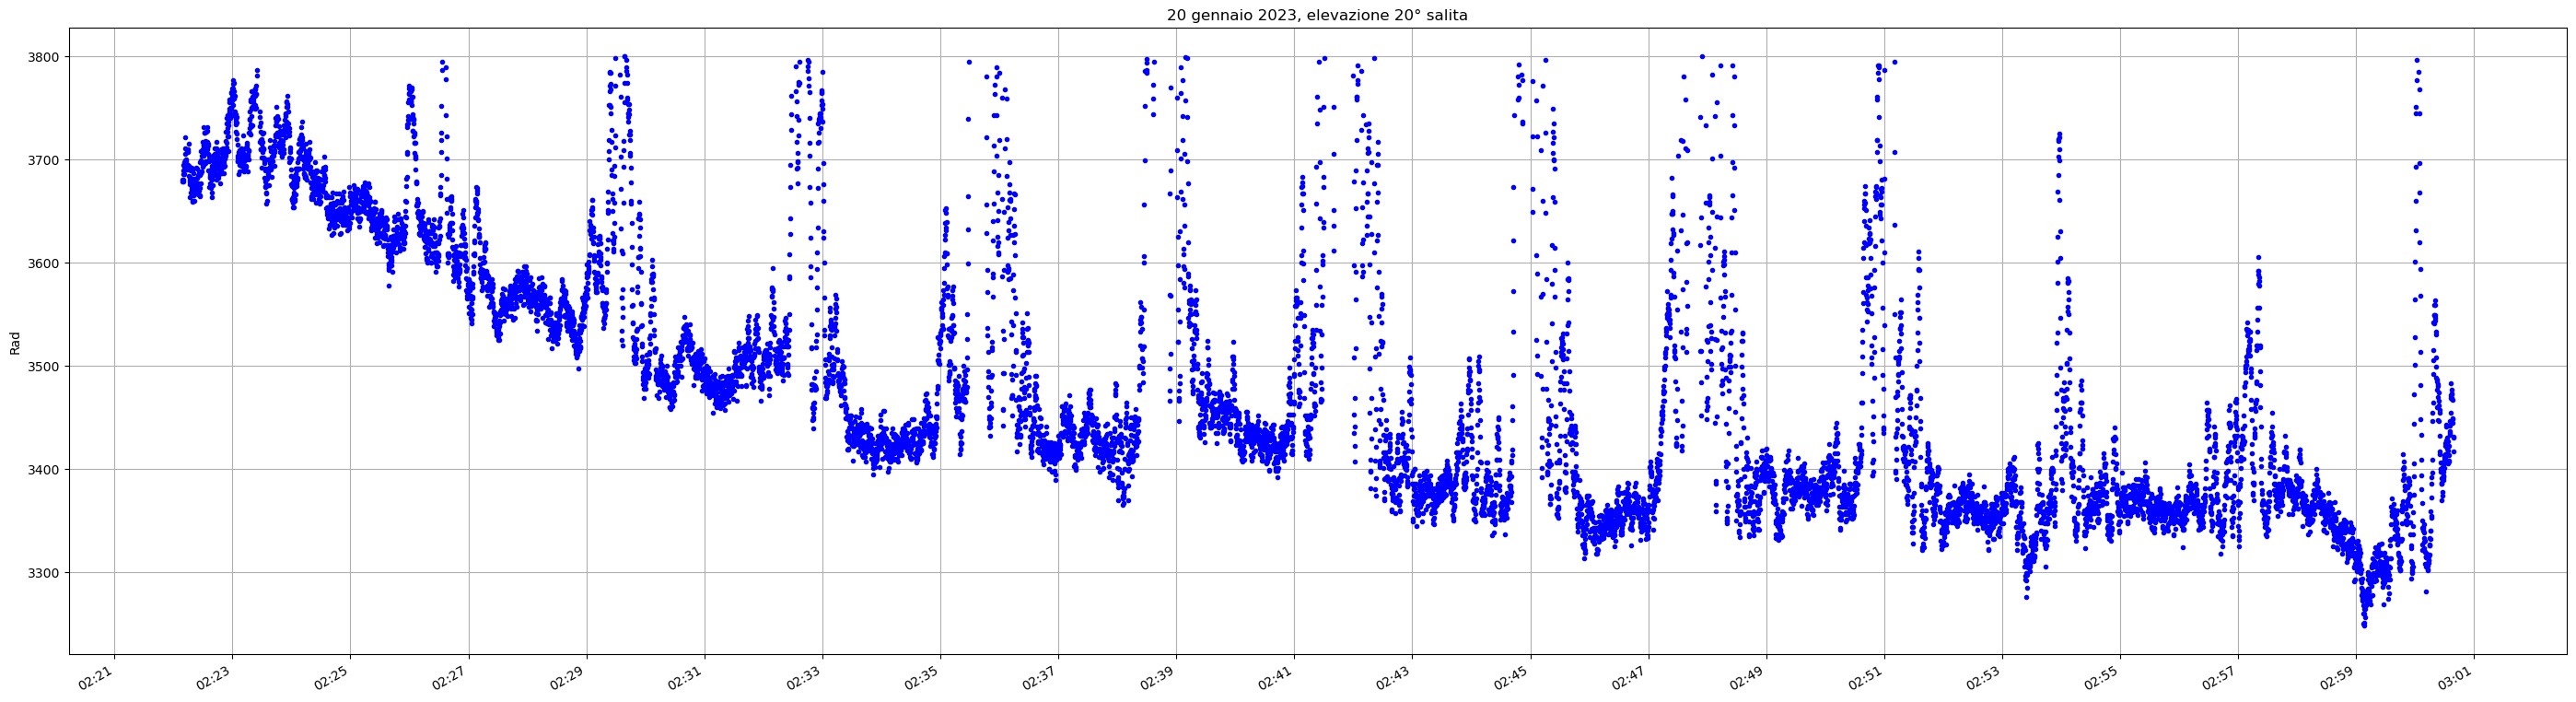

In [123]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(35, 10)


ax.plot(up20_ricevitore_10['data_ora'], up20_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 2))

plt.title(title + '20° salita')
plt.grid()
plt.ylabel('Rad')
plt.show()

# 25 Salita

In [124]:
mask_22 = parabola.elevazione <= 25.1
mask_23 = parabola.elevazione >= 24.9
up25_parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4 & mask_22 & mask_23]
up25_parabola.reset_index(inplace=True, drop=True)


In [125]:
mask_5 = ricevitore_10.data_ora >= up25_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= up25_parabola.iloc[-1]['data_ora'] + delta_time
mask_301 = ricevitore_10.rad <= 3600
up25_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_301]

In [126]:
up25_parabola['data_ora'] = up25_parabola['data_ora'] + 2*delta_time
up25_ricevitore_10['data_ora'] = up25_ricevitore_10['data_ora'] + delta_time

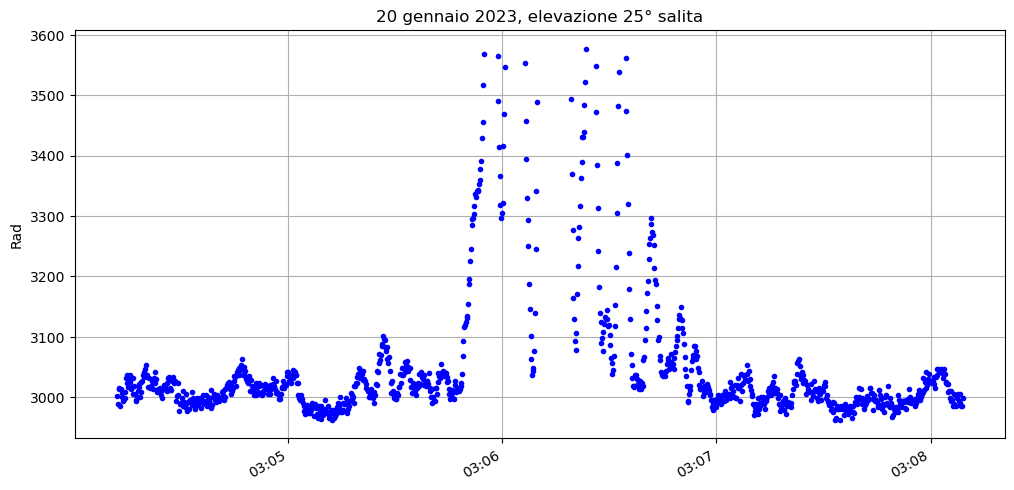

In [127]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(up25_ricevitore_10['data_ora'],up25_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '25° salita')
plt.grid()
plt.ylabel('Rad')
plt.show()

# 30 salita

In [128]:
mask_24 = parabola.elevazione <= 30.1
mask_25 = parabola.elevazione >= 29.9
up30_parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4 & mask_24 & mask_25]
up30_parabola.reset_index(inplace=True, drop=True)

In [129]:
mask_5 = ricevitore_10.data_ora >= up30_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= up30_parabola.iloc[-1]['data_ora'] + delta_time
mask_303 = ricevitore_10.rad <= 3400
up30_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_303]

In [130]:
up30_parabola['data_ora'] = up30_parabola.data_ora + 2*delta_time
up30_ricevitore_10['data_ora'] = up30_ricevitore_10.data_ora + delta_time

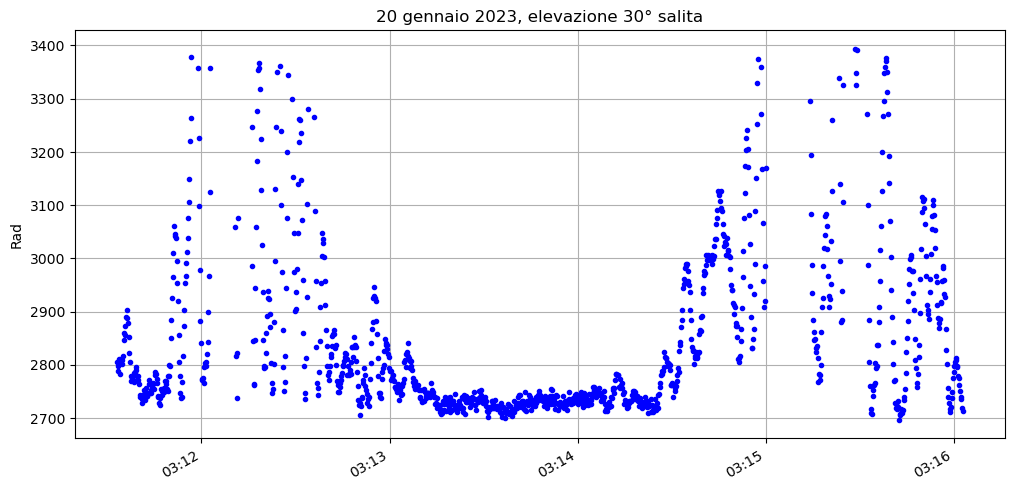

In [131]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(up30_ricevitore_10['data_ora'],up30_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '30° salita')
plt.grid()
plt.ylabel('Rad')
plt.show()

# 35 salita

In [132]:
mask_26 = parabola.elevazione <= 35.1
mask_27 = parabola.elevazione >= 34.9
up35_parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4 & mask_26 & mask_27]
up35_parabola.reset_index(inplace=True, drop=True)

In [133]:
mask_5 = ricevitore_10.data_ora >= up35_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= up35_parabola.iloc[-1]['data_ora'] + delta_time
mask_304 = ricevitore_10.rad <= 3200
up35_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_304]

In [134]:
up35_parabola['data_ora'] = up35_parabola.data_ora + 2*delta_time
up35_ricevitore_10['data_ora'] = up35_ricevitore_10.data_ora + delta_time

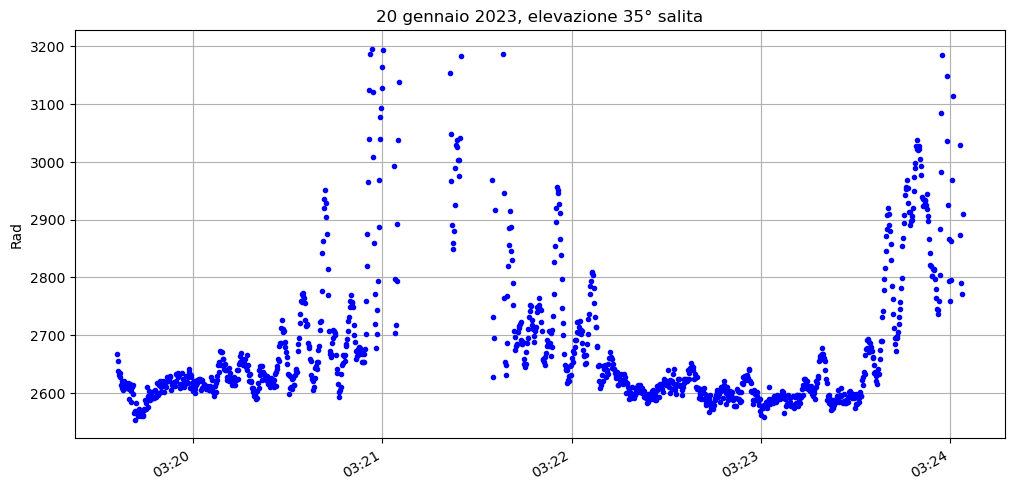

In [135]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(up35_ricevitore_10['data_ora'],up35_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '35° salita')
plt.grid()
plt.ylabel('Rad')
plt.show()

# 40 salita

In [136]:
mask_28 = parabola.elevazione <= 40.1
mask_29 = parabola.elevazione >= 39.9
up40_parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4 & mask_28 & mask_29]
up40_parabola.reset_index(inplace=True, drop=True)

In [137]:
mask_5 = ricevitore_10.data_ora >= up40_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= up40_parabola.iloc[-1]['data_ora'] + delta_time
mask_305 = ricevitore_10.rad <= 3600
up40_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_305]

In [138]:
up40_parabola['data_ora'] = up40_parabola.data_ora + 2*delta_time
up40_ricevitore_10['data_ora'] = up40_ricevitore_10.data_ora + delta_time

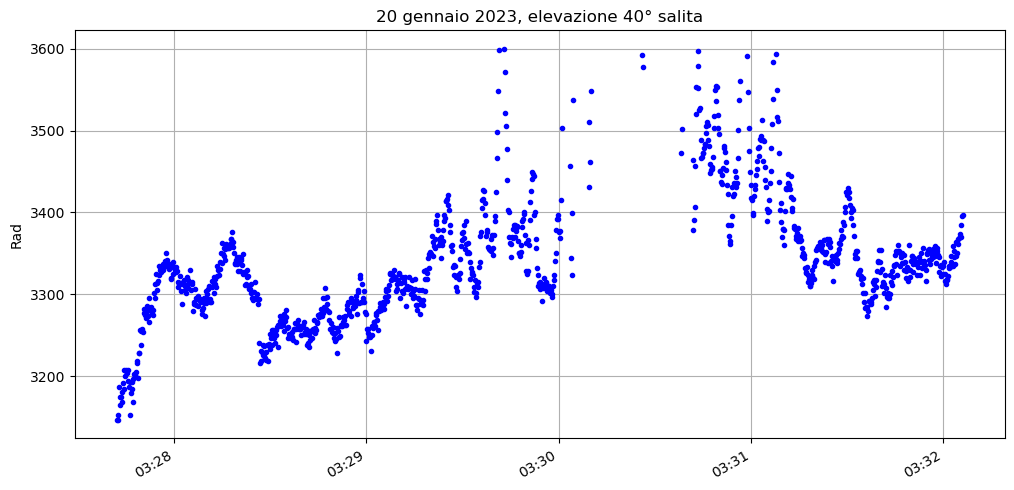

In [139]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(up40_ricevitore_10['data_ora'],up40_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '40° salita')
plt.grid()
plt.ylabel('Rad')
plt.show()

# 45 salita

In [140]:
mask_30 = parabola.elevazione <= 45.1
mask_31 = parabola.elevazione >= 44.9
up45_parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4 & mask_30 & mask_31]
up45_parabola.reset_index(inplace=True, drop=True)

In [141]:
mask_5 = ricevitore_10.data_ora >= up45_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= up45_parabola.iloc[-1]['data_ora'] + delta_time
mask_306 = ricevitore_10.rad <= 3000
up45_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_306]

In [142]:
up45_parabola['data_ora'] = up45_parabola.data_ora + 2*delta_time
up45_ricevitore_10['data_ora'] = up45_ricevitore_10.data_ora + delta_time

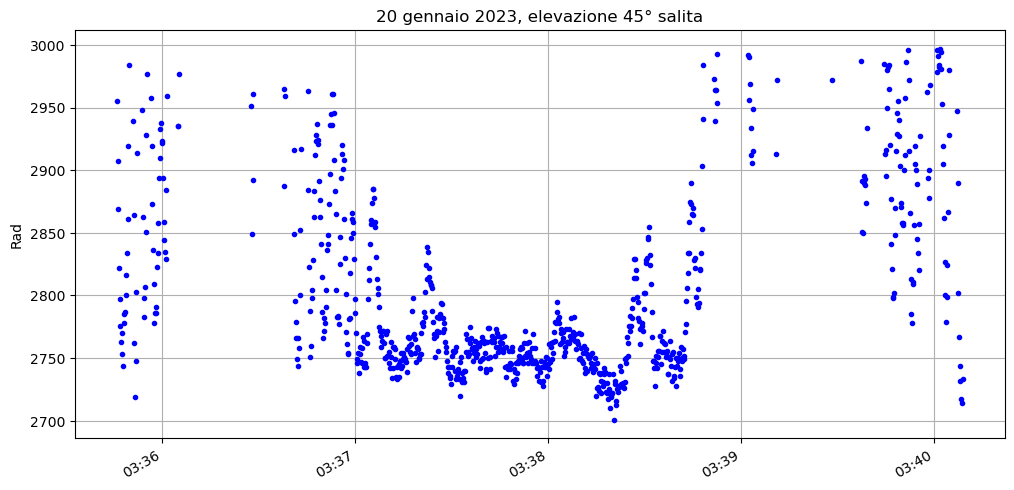

In [143]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(up45_ricevitore_10['data_ora'],up45_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '45° salita')
plt.grid()
plt.ylabel('Rad')
plt.show()

# 50 salita

In [144]:
mask_32 = parabola.elevazione <= 50.1
mask_33 = parabola.elevazione >= 49.9
up50_parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4 & mask_32 & mask_33]
up50_parabola.reset_index(inplace=True, drop=True)

In [145]:
mask_5 = ricevitore_10.data_ora >= up50_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= up50_parabola.iloc[-1]['data_ora'] + delta_time
mask_306 = ricevitore_10.rad <= 4000
up50_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_306]

In [146]:
up50_parabola['data_ora'] = up50_parabola.data_ora + 2*delta_time
up50_ricevitore_10['data_ora'] = up50_ricevitore_10.data_ora + delta_time

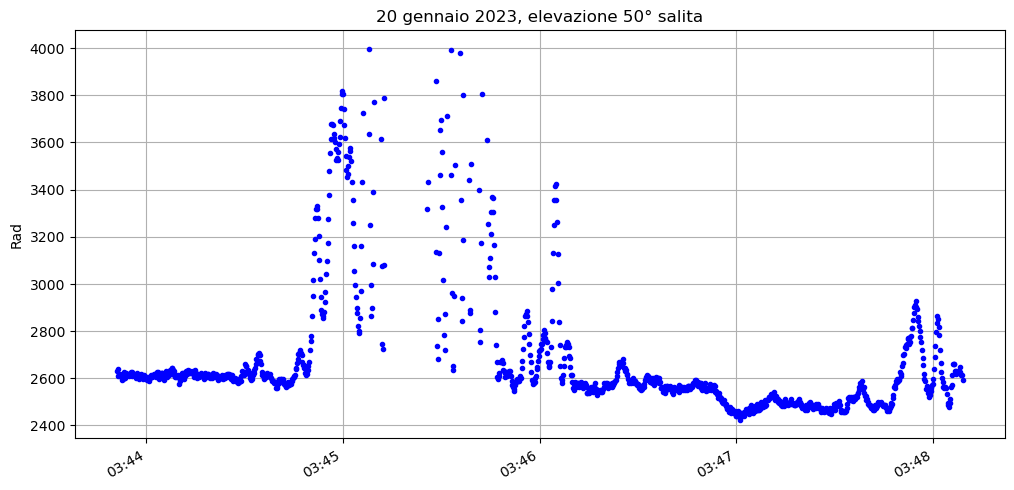

In [147]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(up50_ricevitore_10['data_ora'],up50_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '50° salita')
plt.grid()
plt.ylabel('Rad')
plt.show()

# 55 elevazione

In [148]:
mask_34 = parabola.elevazione <= 55.1
mask_35 = parabola.elevazione >= 54.9
e55_parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4 & mask_34 & mask_35]
e55_parabola.reset_index(inplace=True, drop=True)

In [149]:
mask_5 = ricevitore_10.data_ora >= e55_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= e55_parabola.iloc[-1]['data_ora'] + delta_time
mask_307 = ricevitore_10.rad <= 2800
e55_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_307]

In [150]:
e55_parabola['data_ora'] = e55_parabola.data_ora + 2*delta_time
e55_ricevitore_10['data_ora'] = e55_ricevitore_10.data_ora + delta_time

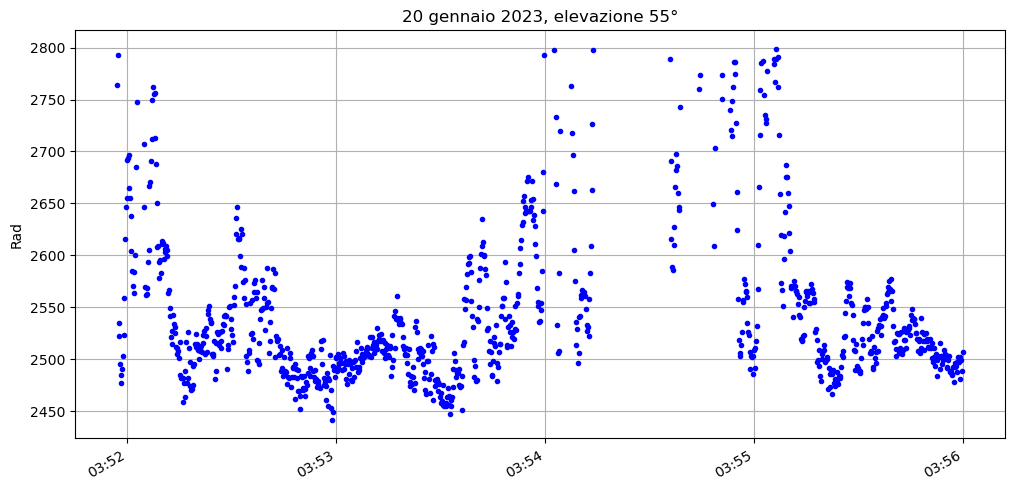

In [151]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(e55_ricevitore_10['data_ora'],e55_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '55°')
plt.ylabel('Rad')
plt.grid()
plt.show()

# 50 discesa

In [152]:
mask_7 = parabola.data_ora >= data_m - 2*delta_time
mask_8 = parabola.data_ora <= data_f

In [153]:
down50_parabola = parabola.loc[mask_1 & mask_2 & mask_7 & mask_8 & mask_32 & mask_33]
down50_parabola.reset_index(inplace=True, drop=True)

In [154]:
mask_5 = ricevitore_10.data_ora >= down50_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= down50_parabola.iloc[-1]['data_ora'] + delta_time
mask_308 = ricevitore_10.rad <= 2600
down50_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_308]

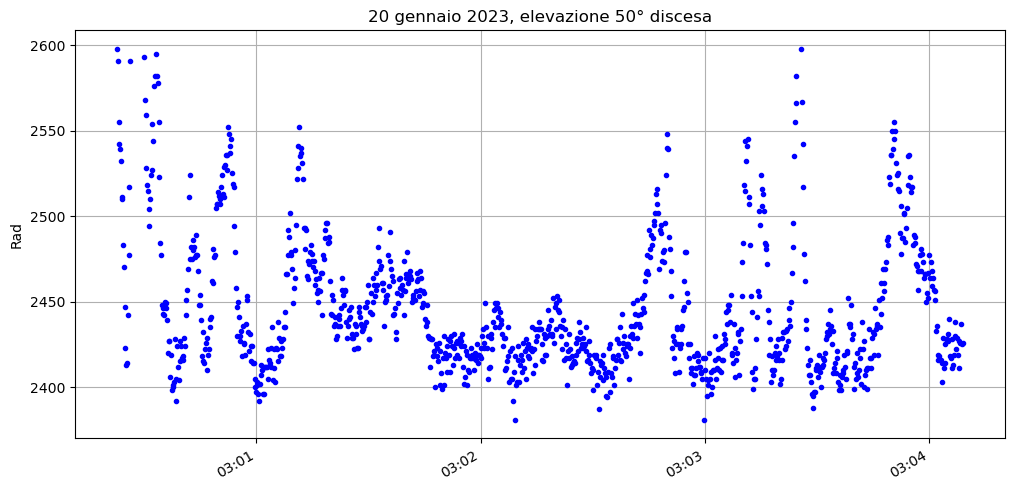

In [155]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(down50_ricevitore_10['data_ora'],down50_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '50° discesa')
plt.grid()
plt.ylabel('Rad')
plt.show()

# 45 discesa

In [156]:
down45_parabola = parabola.loc[mask_1 & mask_2 & mask_7 & mask_8 & mask_30 & mask_31]
down45_parabola.reset_index(inplace=True, drop=True)

In [157]:
mask_5 = ricevitore_10.data_ora >= down45_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= down45_parabola.iloc[-1]['data_ora'] + delta_time
mask_309 = ricevitore_10.rad <= 2600
down45_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_309]

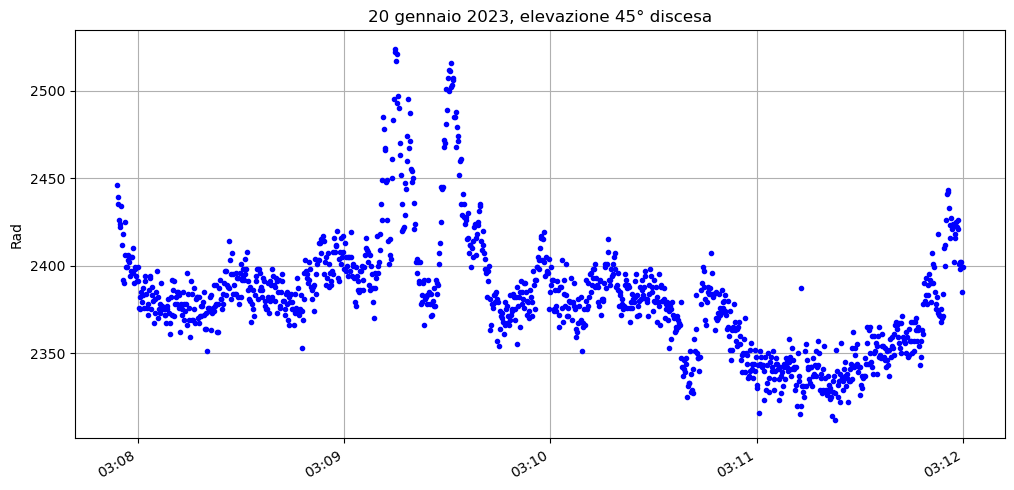

In [158]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(down45_ricevitore_10['data_ora'],down45_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '45° discesa')
plt.ylabel('Rad')
plt.grid()
plt.show()

# 40 discesa

In [159]:
down40_parabola = parabola.loc[mask_1 & mask_2 & mask_7 & mask_8 & mask_29 & mask_28]
down40_parabola.reset_index(inplace=True, drop=True)

In [160]:
mask_5 = ricevitore_10.data_ora >= down40_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= down40_parabola.iloc[-1]['data_ora'] + delta_time
mask_310 = ricevitore_10.rad <= 4000
down40_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_310]

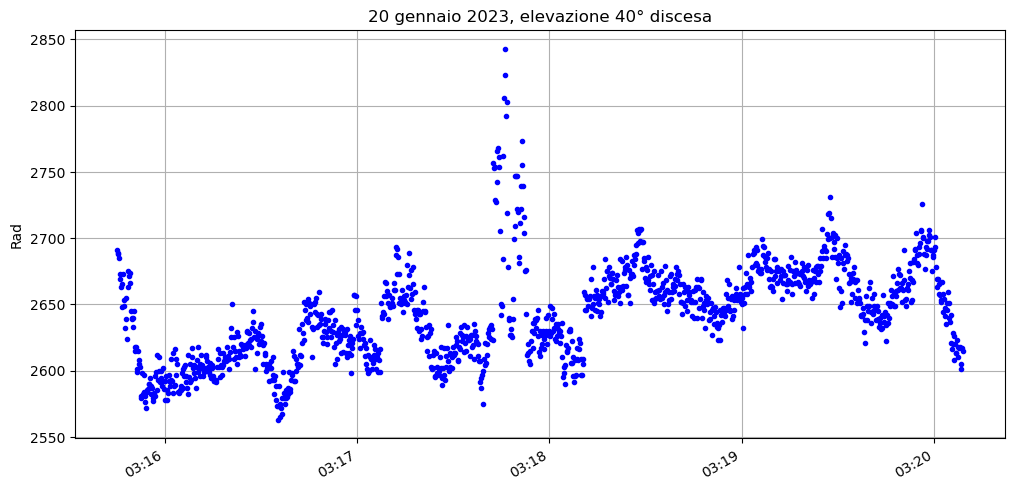

In [161]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(down40_ricevitore_10['data_ora'],down40_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '40° discesa')
plt.ylabel('Rad')
plt.grid()
plt.show()

# 35 discesa

In [162]:
down35_parabola = parabola.loc[mask_1 & mask_2 & mask_7 & mask_8 & mask_27 & mask_26]
down35_parabola.reset_index(inplace=True, drop=True)

In [163]:
mask_5 = ricevitore_10.data_ora >= down35_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= down35_parabola.iloc[-1]['data_ora'] + delta_time
mask_311 = ricevitore_10.rad <= 4000
down35_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_311]

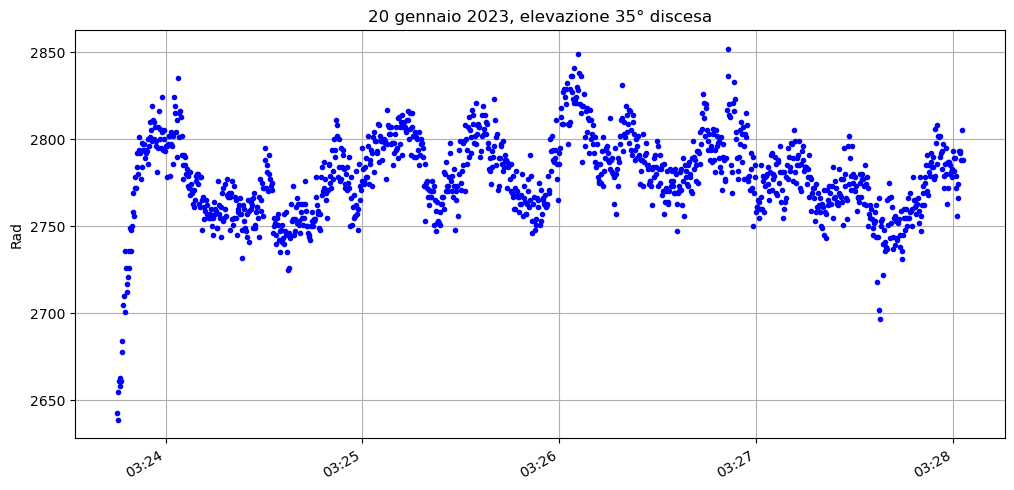

In [164]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(down35_ricevitore_10['data_ora'],down35_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '35° discesa')
plt.ylabel('Rad')
plt.grid()
plt.show()

# 30 discesa

In [165]:
down30_parabola = parabola.loc[mask_1 & mask_2 & mask_7 & mask_8 & mask_25 & mask_24]
down45_parabola.reset_index(inplace=True, drop=True)

In [166]:
mask_5 = ricevitore_10.data_ora >= down30_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= down30_parabola.iloc[-1]['data_ora'] + delta_time
mask_312 = ricevitore_10.rad <= 2600
down30_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_312]

In [167]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(down30_ricevitore_10['data_ora'],down30_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '30° discesa')
plt.ylabel('Rad')
plt.grid()
plt.show()

KeyboardInterrupt: 

# 25 discesa

In [ ]:
down25_parabola = parabola.loc[mask_1 & mask_2 & mask_7 & mask_8 & mask_23 & mask_22]
down25_parabola.reset_index(inplace=True, drop=True)

In [ ]:
mask_5 = ricevitore_10.data_ora >= down25_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= down25_parabola.iloc[-1]['data_ora'] + delta_time
mask_313 = ricevitore_10.rad <= 2600
down25_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_313]

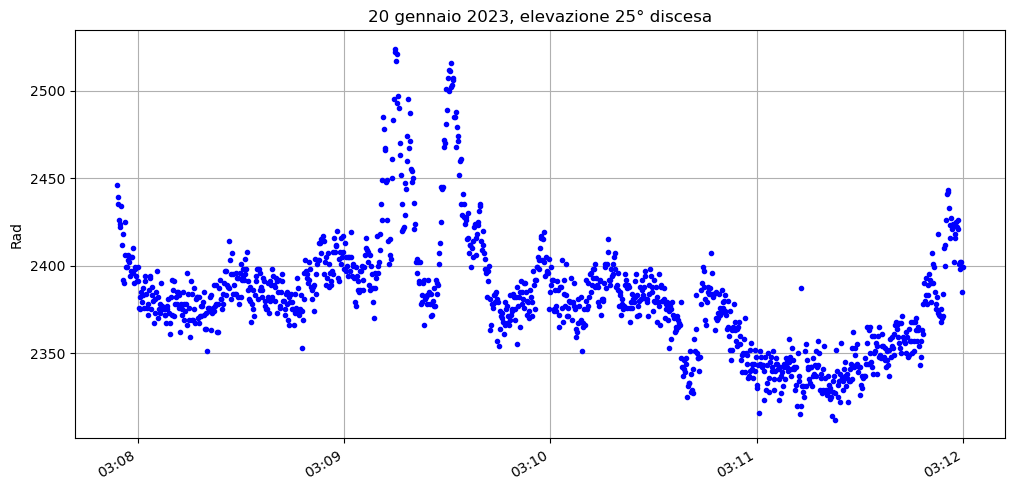

In [ ]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(down45_ricevitore_10['data_ora'],down45_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '25° discesa')
plt.ylabel('Rad')
plt.grid()
plt.show()

# 20 discesa

In [ ]:
down20_parabola = parabola.loc[mask_1 & mask_2 & mask_7 & mask_8 & mask_20 & mask_21]
down20_parabola.reset_index(inplace=True, drop=True)

In [ ]:
mask_5 = ricevitore_10.data_ora >= down20_parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= down20_parabola.iloc[-1]['data_ora'] + delta_time
mask_314 = ricevitore_10.rad <= 2600
down20_ricevitore_10 = ricevitore_10[mask_5 & mask_6 & mask_314]

NameError: name 'down20_ricevitore_10' is not defined

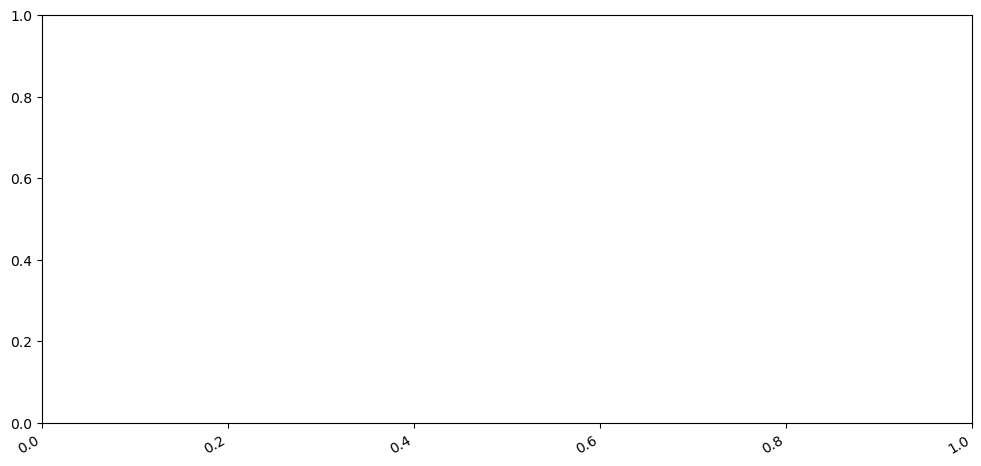

In [ ]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(12, 6)

ax.plot(down20_ricevitore_10['data_ora'],down20_ricevitore_10['rad'], 'b.', label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.title(title + '20° discesa')
plt.ylabel('Rad')
plt.grid()
plt.show()